# MNIST CNN
code comes from [this repository](https://github.com/keras-team/keras/tree/master/examples)

An Intuitive explanation of ConvNets:
https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/

## Convolutional Neural Network

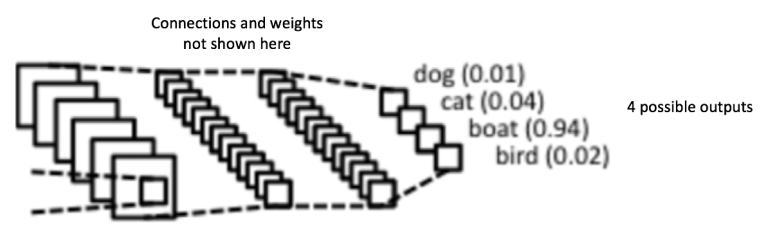


Four main operations in the CNN:
- Convolution
- NonLinear mapping
- pooling or Sub Sampling
- classification (dense layers into softmax)


Channel: each component layer of an image. ex. for RGB images each layer of red-green-blue is a channel stacked on top of the others.

### Convolution
A "kernel" or "filter" is used to perform  matrix multipliation a chunk of neighboring pixels. The filter is moved across the picture creating a feature map. Feature maps act as detectors for certain qualities in groups of neighboring pixels. Since the map preserves information of the relaive location, the feature map shows where on the image these qualities appear.

The convolutional step ats as a feature detetor and is in some ways automated feature engineering.

There is a grab bag of kernels that can be used. each with their own distintive output qualities.



The main purpose of convolution is to break down a complex input image into a series of simpler feature mappings/images. The feature mappings themselves might look something like the original image, but each contains some more derivative information about the picture. 

We specify the number of filters and their sizes, but the neural network learns the best filters to use.

#### Feature Map Size
- Depth - number of flters that we use. Stack the feature maps on top of each other...
- Stride - number of pixels we move the filter by.
- Padding - Border padding used to extract or ignore information contained on the edge of the picture


### NonLinearity
Nonlinear mappings are applied pixel by pixel to the convolutional step's feature maps imposing nonlinearity onto the input of the dense layer later on. So we have a convolved feature map that in some sense is a linear mapping of the features of the picture, then we impose nonlinearity onto these maps to create an altered "nonlinear feature map". 

This is interesting that we need to impose nonlinearity onto out inputs before they even reach the dense layer. Couldnt a dense layer impose  this nonlinearity?

### The Pooling Step

A dimensionality reduction technique used to reduce the complexity of the learning phase.

- Max Pooling - define a spatial neighborhood then take the largest pixel value from that neighborhood and toss out the other values. Create a feature map with only those largest pixels.


Can also use average pooling and sum pooling



### Dense Layer

Traditional MLP that concludes in a softmax activation function. Dense layer learns nonlinear combinations of feature maps.


## CNN BackPropagation
Typical back prop for the dense layer. adjust weights based on if they told you to fire when they should have

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

print("tf ",tf.__version__)
print("keras ",keras.__version__)

Using TensorFlow backend.


tf  1.8.0
keras  2.2.0


In [2]:
from keras.datasets import mnist

from keras.models import Sequential

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

from keras import backend as K

K.image_data_format()

'channels_last'

In [3]:
batch_size = 28
num_classes = 10
epochs = 12
img_rows, img_cols = 28, 28


# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [5]:
model = Sequential()
model.add(Conv2D(32, 3, activation = 'relu', ))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(123, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))


model.compile(loss = keras.losses.categorical_crossentropy,
             optimizer = keras.optimizers.Adadelta(),
             metrics = ['accuracy'])


In [6]:
model.fit(x_train, y_train,
          batch_size = batch_size,
          epochs = epochs,
         validation_data = (x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 15s 249us/step - loss: 0.2607 - acc: 0.9207 - val_loss: 0.0832 - val_acc: 0.9752
Epoch 2/12
60000/60000 [==============================] - 11s 179us/step - loss: 0.1195 - acc: 0.9640 - val_loss: 0.0607 - val_acc: 0.9800
Epoch 3/12
60000/60000 [==============================] - 11s 180us/step - loss: 0.0949 - acc: 0.9728 - val_loss: 0.0517 - val_acc: 0.9833
Epoch 4/12
60000/60000 [==============================] - 10s 171us/step - loss: 0.0820 - acc: 0.9754 - val_loss: 0.0495 - val_acc: 0.9849
Epoch 5/12
60000/60000 [==============================] - 11s 176us/step - loss: 0.0798 - acc: 0.9770 - val_loss: 0.0501 - val_acc: 0.9837
Epoch 6/12
60000/60000 [==============================] - 10s 172us/step - loss: 0.0779 - acc: 0.9780 - val_loss: 0.0445 - val_acc: 0.9854
Epoch 7/12
60000/60000 [==============================] - 10s 170us/step - loss: 0.0759 - acc: 0.9786 - val_loss: 0.

In [9]:
score = model.evaluate(x_test, y_test)
print('accuracy: ', score[1])

10000/10000 [==============================] - 1s 55us/step
accuracy:  0.9854
